In [2]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# Crear las carpetas cleaned_data y views si no existen
os.makedirs('cleaned_data', exist_ok=True)
os.makedirs('views', exist_ok=True)

# Cargar los datos desde el archivo de texto
df = pd.read_csv('data/df_final_demo.txt', delimiter=',')

# Renombrar las columnas a español
df.columns = [
    'ID del cliente', 
    'Antigüedad en años', 
    'Antigüedad en meses', 
    'Edad', 
    'Género', 
    'Número de cuentas', 
    'Saldo', 
    'Llamadas en 6 meses', 
    'Logins en 6 meses'
]

# 1. Verificación de valores atípicos
# Gráfico de caja para el Saldo
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Saldo'])
plt.title('Gráfico de caja para saldo')
plt.xlabel('Saldo')
plt.savefig('views/grafico_caja_saldo.png')  # Guardar el gráfico
plt.close()

# Gráfico de caja para Antigüedad en años
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Antigüedad en años'])
plt.title('Gráfico de caja para antigüedad en años')
plt.xlabel('Antigüedad en años')
plt.savefig('views/grafico_caja_antiguedad.png')  # Guardar el gráfico
plt.close()

# Gráfico de caja para Edad
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Edad'])
plt.title('Gráfico de caja para edad')
plt.xlabel('Edad')
plt.savefig('views/grafico_caja_edad.png')  # Guardar el gráfico
plt.close()

# 2. Tratamiento de Valores Nulos
# Eliminar filas con valores nulos
df.dropna(inplace=True)

# 3. Conversión de Tipos de Datos
# Convertir la Edad a entero
df['Edad'] = df['Edad'].astype(int)

# Mapeo de valores en la columna 'Género'
df['Género'] = df['Género'].replace({
    'F': 'Mujer', 
    'M': 'Hombre', 
    'Desconocido': 'Indefinido',
    'U': 'Indefinido', 
    'x': 'Indefinido'
})

# Eliminar filas donde 'Género' no sea 'Mujeres', 'Hombres' o 'Indefinido'
df = df[df['Género'].isin(['Mujer', 'Hombre', 'Indefinido'])]

# Asegurarse de que columnas categóricas estén definidas correctamente
df['Género'] = df['Género'].astype('category')

# 4. Análisis Exploratorio
# Análisis de correlación: seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')  # Solo columnas numéricas
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.savefig('views/matriz_correlacion.png')  # Guardar el gráfico
plt.close()

# Gráfico de dispersión: Antigüedad vs Saldo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Antigüedad en años', y='Saldo', data=df)
plt.title('Antigüedad en años vs saldo')
plt.xlabel('Antigüedad en años')
plt.ylabel('Saldo')
plt.savefig('views/antiguedad_vs_saldo.png')  # Guardar el gráfico
plt.close()

# 5. Modelo Predictivo (Ejemplo de regresión lineal)
# Definir variables predictivas y objetivo
X = df[['Antigüedad en años', 'Edad', 'Número de cuentas']]  # Ejemplo de variables predictivas
y = df['Saldo']  # Variable objetivo

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

# 6. Cálculo de nuevas métricas y agregarlas al DataFrame
# Media del Saldo
df['Media de saldo'] = df['Saldo'].mean()

# Desviación Estándar del Saldo
df['Desviación Estándar del saldo'] = df['Saldo'].std()

# Mínimo y Máximo del Saldo
df['Saldo mínimo'] = df['Saldo'].min()
df['Saldo máximo'] = df['Saldo'].max()

# Total de Clientes
df['Total de clientes'] = len(df)

# Promedio de antigüedad por género, manejando la advertencia
promedio_antiguedad = df.groupby('Género', observed=True)['Antigüedad en años'].mean().rename('Promedio de antigüedad por género')
df = df.join(promedio_antiguedad, on='Género')

# Formatear las columnas que contienen 'Saldo'
saldo_columns = ['Saldo', 'Media de saldo', 'Desviación Estándar del saldo', 'Saldo mínimo', 'Saldo máximo']
for col in saldo_columns:
    df[col] = df[col].apply(lambda x: f'€{x:,.2f}')

# Guardar los datos limpios en el mismo archivo Excel original
output_file_path = 'cleaned_data/cleaned_df_final_demo.xlsx'
df.to_excel(output_file_path, index=False)
print(f'Datos limpios y métricas agregadas guardados en: {output_file_path}')


MSE: 93000948695.41978
R^2: 0.10462813190624443
Datos limpios y métricas agregadas guardados en: cleaned_data/cleaned_df_final_demo.xlsx


In [43]:
import pandas as pd
import os

# 1. Cargar los archivos .txt
df_pt1 = pd.read_csv('data/df_final_web_data_pt_1.txt', delimiter=',')
df_pt2 = pd.read_csv('data/df_final_web_data_pt_2.txt', delimiter=',')

# 2. Definir una función para aplicar los cambios y cálculos
def procesar_dataframe(df, nombre_archivo):
    # Renombrar las columnas a español
    df.columns = ['Identificador del cliente', 'Identificador del visitante', 'Identificador de la visita', 'Pasos del proceso', 'Fecha y hora']

    # Convertir la columna 'Fecha y hora' en formato datetime
    df['Fecha y hora'] = pd.to_datetime(df['Fecha y hora'])

    # Crear nuevas columnas: 'Año', 'Mes', 'Día', 'Fecha'
    df['Año'] = df['Fecha y hora'].dt.year
    df['Mes'] = df['Fecha y hora'].dt.month_name(locale='es_ES').str.capitalize()
    df['Día'] = df['Fecha y hora'].dt.day_name(locale='es_ES').str.capitalize()
    df['Fecha'] = df['Fecha y hora'].dt.day

    # Renombrar los valores en 'Pasos del proceso'
    renombrar_pasos = {
        'step_3': 'Paso 3',
        'step_2': 'Paso 2',
        'step_1': 'Paso 1',
        'start': 'Inicio',
        'confirm': 'Confirmación'
    }
    df['Pasos del proceso'] = df['Pasos del proceso'].replace(renombrar_pasos)

    # Ver los valores únicos de la columna 'Pasos del proceso'
    valores_pasos = df['Pasos del proceso'].unique()
    print(f"Valores únicos en 'Pasos del proceso' para {nombre_archivo}: {valores_pasos}")

    # Eliminar filas con valores NaN
    df_cleaned = df.dropna()

    # Calcular KPI y métricas

    # Total de visitas por cliente
    df_cleaned['Total de visitas por cliente'] = df_cleaned.groupby('Identificador del cliente')['Identificador de la visita'].transform('count')

    # Tasa de Conversión (Confirmaciones / Total de visitas)
    total_visitas = df_cleaned['Identificador de la visita'].count()
    total_confirmaciones = df_cleaned[df_cleaned['Pasos del proceso'] == 'Confirmación']['Identificador de la visita'].count()
    tasa_conversion = (total_confirmaciones / total_visitas) * 100
    df_cleaned['Tasa de conversión'] = tasa_conversion

    # Tiempo entre cada paso del proceso para cada cliente
    df_cleaned['Diferencia de tiempo'] = df_cleaned.groupby('Identificador del cliente')['Fecha y hora'].diff().dt.total_seconds()

    # Tiempo total por cliente
    df_cleaned['Tiempo total por cliente'] = df_cleaned.groupby('Identificador del cliente')['Diferencia de tiempo'].transform('sum')

    # Tiempo utilizado en cada paso del proceso
    df_cleaned['Tiempo en el paso'] = df_cleaned.groupby(['Identificador del cliente', 'Pasos del proceso'])['Fecha y hora'].diff().dt.total_seconds()

    # Tiempo promedio por paso del proceso
    tiempo_promedio_por_paso = df_cleaned.groupby('Pasos del proceso')['Diferencia de tiempo'].mean().reset_index()
    tiempo_promedio_por_paso.columns = ['Pasos del proceso', 'Tiempo promedio por paso en segundos']
    df_cleaned = df_cleaned.merge(tiempo_promedio_por_paso, on='Pasos del proceso', how='left')

    # Tiempo total en completar el proceso (de Inicio a Confirmación)
    df_cleaned['Tiempo total en proceso'] = df_cleaned.groupby('Identificador del cliente')['Diferencia de tiempo'].cumsum()

    # Total de Clientes Únicos
    total_clientes_unicos = df_cleaned['Identificador del cliente'].nunique()
    df_cleaned['Total de clientes únicos'] = total_clientes_unicos

    # Tasa de Retención
    clientes_regresados = df_cleaned[df_cleaned.duplicated(subset='Identificador del cliente', keep=False)]['Identificador del cliente'].nunique()
    tasa_retencion = (clientes_regresados / total_clientes_unicos) * 100
    df_cleaned['Tasa de retención'] = tasa_retencion

    # Promedio de Visitas por Cliente
    promedio_visitas_por_cliente = total_visitas / total_clientes_unicos
    df_cleaned['Promedio de visitas por cliente'] = promedio_visitas_por_cliente

    # Verificar si la carpeta 'cleaned_data' existe, si no, crearla
    output_folder = 'cleaned_data'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Guardar el DataFrame limpio con las nuevas columnas en un archivo Excel (sobrescribiendo si ya existe)
    output_path = f'{output_folder}/{nombre_archivo}.xlsx'

    if os.path.exists(output_path):
        os.remove(output_path)

    df_cleaned.to_excel(output_path, index=False)
    print(f"El archivo Excel '{nombre_archivo}.xlsx' se ha generado correctamente con las nuevas métricas y KPIs.")

# 3. Aplicar la función a los dos DataFrames por separado

# Procesar la web anterior
procesar_dataframe(df_pt1, 'cleaned_df_final_web_data_pt_1')

# Procesar la web nueva
procesar_dataframe(df_pt2, 'cleaned_df_final_web_data_pt_2')


Valores únicos en 'Pasos del proceso' para cleaned_df_final_web_data_pt_1: ['Paso 3' 'Paso 2' 'Paso 1' 'Inicio' 'Confirmación']
El archivo Excel 'cleaned_df_final_web_data_pt_1.xlsx' se ha generado correctamente con las nuevas métricas y KPIs.
Valores únicos en 'Pasos del proceso' para cleaned_df_final_web_data_pt_2: ['Confirmación' 'Paso 3' 'Paso 2' 'Paso 1' 'Inicio']
El archivo Excel 'cleaned_df_final_web_data_pt_2.xlsx' se ha generado correctamente con las nuevas métricas y KPIs.


Primeras filas del archivo:
   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None

Columnas renombradas:
Index(['Identificador del cliente', 'Variación'], dtype='object')

Conteo de valores en la columna 'Variación':
Variación
Test       26968
Control    23532
Name: count, dtype: int64


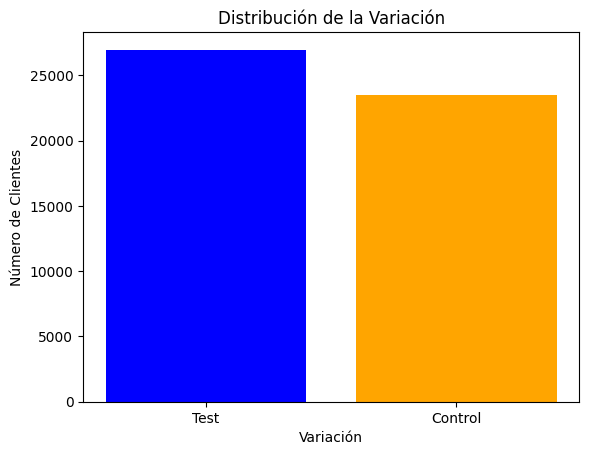


Archivo guardado como: cleaned_data/cleaned_df_final_experiment_clients.xlsx


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ruta al archivo de texto
file_path = 'data/df_final_experiment_clients.txt'

# Cargar el archivo con delimitador ','
df = pd.read_csv(file_path, delimiter=',')

# Ver las primeras filas del DataFrame para entender la estructura
print("Primeras filas del archivo:")
print(df.head())

# Información del DataFrame (tipos de datos de cada columna)
print("\nInformación del DataFrame:")
print(df.info())

# Renombrar columnas a español
columnas_traducidas = {
    'client_id': 'Identificador del cliente',
    'Variation': 'Variación',
}

df.rename(columns=columnas_traducidas, inplace=True)

# Verificar los cambios
print("\nColumnas renombradas:")
print(df.columns)

# Contar valores únicos en la columna 'Variación'
variacion_counts = df['Variación'].value_counts()
print("\nConteo de valores en la columna 'Variación':")
print(variacion_counts)

# Graficar la distribución
plt.bar(variacion_counts.index, variacion_counts.values, color=['blue', 'orange'])
plt.title('Distribución de la Variación')
plt.xlabel('Variación')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()

# Crear la carpeta cleaned_data si no existe
os.makedirs('cleaned_data', exist_ok=True)

# Guardar el DataFrame con columnas traducidas como archivo Excel
output_file_path = 'cleaned_data/cleaned_df_final_experiment_clients.xlsx'
df.to_excel(output_file_path, index=False)

print(f"\nArchivo guardado como: {output_file_path}")

# Opcional: análisis estadístico si hay otras columnas
# Asegúrate de que hay una columna 'resultado' para el análisis
if 'resultado' in df.columns:
    resultados = df.groupby('Variación')['resultado'].describe()
    print("\nEstadísticas descriptivas por grupo:")
    print(resultados)
